<a href="https://colab.research.google.com/github/cykrr/ada/blob/master/informe3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MaxSubArray()

## Descripción del problema

El problema del **subarreglo máximo** consiste en, dado un arreglo $A$ de una
cantidad de elementos relativa $n$.

$$
A: [A_1, A_2, ..., A_n]
$$

Buscamos un subarreglo $B$ de al menos un elemento, de forma que la suma de sus
elementos sea la mayor entre todos los posibles subarreglos de $A$.  cumpliendo
para cada valor $A_n \in \mathbb R$.

Nuestra primera solución sería calcular todos los subarreglos posibles y
repetir para los segundos números. Sin embargo esto no sería óptimo ya
que tendría complejidad $O(n^3)$ .

```python
for i in range (n-1):
    for j in range(i, n-1):
        for k in range (i, j):
            ...
```

Podemos ahorrar tiempo guardando la suma del subarreglo anterior y le sumamos el
número extra. Esto reduce la cantidad de cálculos y la cota asintótica a
$O(n^2)$.

```python
sum = 0
currentSum = 0
for i in range (n-1):
    for j in range(i, n-1):
        currentSum += num[j];
```

Es necesario calcular cada subarray pasando por cada posible subarreglo?
No es mandatorio. Podemos recorrer el arreglo y descartar todos los valores
negativos antes de cada valor positivo. Entonces podemos movernos hasta el
primer valor positivo sin complicaciones. Esto se conoce como el algoritmo de
Kadane y tiene una complejidad  $O(n)$.

## Descripción del algoritmo

Existen distintas formas de resolver este problema, distintos algoritmos con
distintos tiempos de ejecución. En el presente informe trabajaremos con la
solución recursiva y posteriormente la compararemos con el algoritmo de Kadane.

Dado un arreglo $A$ de largo $n$, buscamos un punto medio $c$. El cual se
utiliza con el objetivo de fraccionar el arreglo $A$ en dos subarreglos $L$ y
$R$.

$$
L = [A_1, A_2, \space \dots \space, A_{c-1}]
$$

$$
R = [A_c, A_{c+1}, \space \dots \space, A_n]
$$

En este punto si buscamos la solución tenemos tres posibles casos

El subarreglo máximo:

* Es un subarreglo de $L$
* Es un subarreglo de $R$
* Está entre los dos subarreglos

El arreglo central $C$ es revisado de manera lineal. Mientras que los arreglos
$L$ y $R$ son revisados de manera recursiva, estos se dividen hasta llegar al
caso base.

### Caso base

El caso base se da cuando la longitud del arreglo es de un elemento, donde la
suma máxmia es su único elemento.

#### Revisión  del  arreglo central $C$

Recorremos el subarreglo $A$ desde el centro hasta los extremos, sin importar
el orden.

Para ambos casos, al pasar por un elemento revisamos si la suma sería mayor
con ese número, de ser así, lo incluímos en el subarreglo máximo.

Al finalizar retornamos la suma entre el sector izquierdo y el sector derecho,
junto con los índices que indican los límites del subarreglo máximo.

### Conclusión del algoritmo

Para finalizar, retornamos la mayor entre la suma central, la suma izquierda y
la suma derecha.

## Implementación


In [45]:
import math
import random
def maxCenter(a, c, l, r, level = 0, Verbose = False):
#    if Verbose: print(a[l:r])
    ls = -math.inf
    rs = -math.inf
    s = 0 
    ll = c-1
    lr = c
    rl = c 
    rr = len(a)
    if Verbose: print (" " * level * 2 + "Recorrido izquierda: ");
    for i in range (c-1, l-1, -1):
        if Verbose: print(" " * (level + 1)* 2 + "Pasando por " + str(a[i]))
        s += a[i]
        if ls < s:
            if Verbose: print(" " * (level + 2) * 2 + "Incluyo")
            ls = s;
            ll = i
        else: 
            if Verbose: print(" " * (level + 2) * 2 + "No Incluyo")
    s = 0;
    if Verbose: print (" " * level * 2 + "Recorrido derecha: ");
    for i in range (c, r):
        if Verbose: print(" " * (level + 1)* 2 + "Pasando por " + str(a[i]))
        s += a[i]
        if rs < s:
            if Verbose: print(" " * (level + 2) * 2 + "Incluyo")
            rs = s
            rr = i+1
        else: 
            if Verbose: print(" " * (level + 2) * 2 + "No Incluyo")

    return ls + rs, ll, rr;

    
        
        
def maxSubArray(a, l = -1, r = -1, level = 0, Verbose = False):
    if l == -1 and r == -1:
      l = 0;
      r = len(a);

    if ( r-l == 1):
      if Verbose: print(a[l:r], "{")
      if Verbose: print(" " * 2 * level + str(a[l:r]) + ": Caso base")
      return a[r-1], l, r 

    if Verbose: print(a[l:r], "{")
#    if Verbose: print("L: ", l, "R: ", r)

    c = (l + r) // 2

    level +=1

    if Verbose: print(" " * level * 2 + "Recursión izquierda ", end = "")
    ls, ll, lr = maxSubArray(a, l, c, level = level + 1, Verbose = Verbose);
    if Verbose: print (" " * level * 2 + "} Resultado: ", ls, a[ll:lr])
    if Verbose: print()
    if Verbose: print(" " * level * 2 + "Recursión derecha ", end = "")
    rs, rl, rr = maxSubArray(a, c , r, level = level + 1, Verbose = Verbose);
    if Verbose: print (" " * level * 2 + "} Resultado: ", a[rl:rr])
    if Verbose: print()
#    if Verbose: print ("rs", rs, rl, rr, a[c:], a[rl:rr])
    if Verbose: print(" " * level * 2 + "Recursión centro " + str(a[l:r]) + " {")
    cs, cl, cr = maxCenter(a, c, l, r, level = level + 1, Verbose = Verbose)
    if Verbose: print(" " * level * 2 + "} Resultado " + str(cs) + " " + str(a[l:r]))
    if Verbose: print()
    level -= 1
    m = max (cs, ls, rs)
    if m == cs:
        return cs, cl, cr;
    elif m == ls:
        return ls, ll, lr
    elif m == rs:
        return rs, rl, rr;

#a = [1, 2, 3, -8, 2, 3, -2, 2, 3, -5, 8, 1, -3, 1, 5, -8, -9, 10, 1, -1, -2, 7]
#a = [-2, -5, -6, 1, 2, 3]
#a =  [1, 2, 5, -1,  6, 3]
a = random.sample(range(-500, 500), 500)
#a = [1, -2]
#a = [1,2,3, -2, -5, -6]
#a = [1, 2, 3, 2, 5,6,7,8,9,10]
s, b, c = maxSubArray(a, Verbose = True)


Se han truncado las últimas 5000 líneas del flujo de salida.
                No Incluyo
              Pasando por 149
                Incluyo
              Pasando por -273
                No Incluyo
              Pasando por 324
                Incluyo
              Pasando por -445
                No Incluyo
              Pasando por -102
                No Incluyo
              Pasando por -383
                No Incluyo
              Pasando por 452
                No Incluyo
              Pasando por -30
                No Incluyo
              Pasando por 25
                No Incluyo
              Pasando por 33
                No Incluyo
              Pasando por -373
                No Incluyo
              Pasando por 167
                No Incluyo
              Pasando por -53
                No Incluyo
              Pasando por -489
                No Incluyo
              Pasando por -96
                No Incluyo
              Pasando por 36
                No Incluyo
   

### Ejemplo de ejecución

```python
[1, -2, 3] {
  Recursión izquierda [1] {
    [1]: Caso base
  } Resultado:  1 [1]

  Recursión derecha [-2, 3] {
      Recursión izquierda [-2] {
        [-2]: Caso base
      } Resultado:  -2 [-2]

      Recursión derecha [3] {
        [3]: Caso base
      } Resultado:  [3]

      Recursión centro [-2, 3] {
        Recorrido izquierda: 
          Pasando por -2
            Incluyo
        Recorrido derecha: 
          Pasando por 3
            Incluyo
      } Resultado 1 [-2, 3]

  } Resultado:  [3]

  Recursión centro [1, -2, 3] {
    Recorrido izquierda: 
      Pasando por 1
        Incluyo
    Recorrido derecha: 
      Pasando por -2
        Incluyo
      Pasando por 3
        Incluyo
  } Resultado 2 [1, -2, 3]

} Resultado 3 [3]
```

## Ejemplo detallado del algoritmo

Para el caso de $A: [1, -2, 3]$ dividimos en el punto central, obteniendo los
subarreglos

$$L: [1]$$

$$R: [-2, 3]$$

Trabajando con $L:$

* Caso base, retornamos el valor y su posición, $(Suma, l, r) = (1, 0, 1)$
* Obtenemos $L = [1]$

Trabajando con $R:$

* Dividimos en
  * $R_L: [-2]$
    * Caso base
  * $R_R: [3]$
    * Caso Base
* Entre $R_L$ y $R_R$ nos quedamos con el mayor $R_R = [3]$
* Obtenemos $R = [3]$

Trabajando con $C$

* Iteramos del centro a la izquierda
  * Pasamos por el 1 y lo incluimos pues es el primer valor que encontramos
* Iteramos del centro a la derecha
  * Pasamos por el -2 y lo incluimos pues es el primer valor que nos
  encontramos
  * Pasamos por el 3 y lo incluimos pues aumenta el valor de nuestra suma total
* Obtenemos $C: [1, -2, 3]$

Comparamos los resultados:

Entre $L, R, C$ nos quedamos con el mayor.

$$
( sum(L) = 1 ) < (sum(C) = 2) < (sum(R) = 3)
$$

Obteniendo así como resultado el subarreglo $R = [3]$

## Correctitud del algoritmo

### Función `maxCenter`

La función `maxCenter` es un algoritmo iterativo con complejidad
$O(n)$. Para determinar si esta función es correcta es conveniente utilizar la
propiedad invariante del bucle.

Recordar que este algoritmo trabaja desde el centro del arreglo a sus extremos.
Es decir, se recorre a la izquierda con un ciclo y a la derecha con otro.

Para cada bucle necesitamos dos datos. Definimos la **suma** $S$ como la suma
de todos los elementos visitados y la **suma maxima** $SM$ como la suma que posee
sólo los elementos que maximizan la suma.

**Propiedad invariante**: En todo momento la suma máxima será menor o igual a la
suma de todos los elementos. Es decir $S \leq SM$.

Utilizamos un contador $i$ para recorrer el arreglo .Tanto del centro a la
izquierda como del centro a la derecha

* $L: [A_{l,}...,A_{c-1}]$
(de derecha a izquierda).

* $R: [A_c, ...,  A_r]$ (de izquierda a derecha);

**Inicialización**: La suma total es 0 y máxima ya que no ha sido visitado ningún
elemento del arreglo $A$. $S = SM$.

**Mantención**: En cada iteración tenemos dos posibles casos

* El elemento actual aumenta el valor de la suma
  * Le asignamos el valor $S = SM$
  * Actualizamos el límite para que incluya
    el nuevo valor
* El elemento actual **no** aumenta el valor de la suma.
  * Mantenemos $SM$ intacto
  * Se cumple que ${S} < {SM}$

Para finalizar la iteración aumentamos en $1$ el valor de $i$.

**Finalización**:  Al finalizar se ha recorrido la totalidad del brazo

* $i == l$ en el brazo izquierdo
* $i == r - 1$ en el brazo derecho

Por lo que $SM$ posee la suma total máxima de todos los elementos recorridos.
Finalmente retornamos el valor de la suma máxima, así como los límites de los
brazos izquierdo y derecho.

### Tiempo de ejecución del algoritmo maxSubArray

El algoritmo maxSubArray realiza dos llamadas recursivas con un problema cuyo
tamaño es la mitad del problema inicial. Además de la llamada a la función
`maxCenter`. Cuya complejidad es de $O(n)$. De esto obtenemos que la función de
recurrencia del algoritmo `maxSubArray` es la siguiente:

$$
T(n) \leq 2\cdot T \left ( n/2 \right ) + O(n)
$$

Este algoritmo tiene la particularidad de cumplir con el teorema maestro.

El cual nos dice que para toda función de recursión de la forma

$$
T(n) \leq a \cdot T  \left ( n/b \right) + O(n^c)
$$

La complejidad estará dada por:

* $O(n^c \cdot \log n)$ En el caso de que $a = b^c$
* $O(n^c)$ En el caso de que $a < b^c$
* $O(n^{\log_b a})$ En el caso de que $a > b^c$

En el caso del algoritmo del sub arreglo máximo recursivo. Los valores de
$a, b, c$ serían:

$$
a = 2 \\
b = 2 \\
c = 1
$$

$$a = b^c = 2$$

De lo anterior se obtiene que:
$$T(n) = O(n^c \cdot \log n) = O(n \log n)$$

### Prueba por inducción

Asumimos que $T(n) \leq O(n \log n)$.

$$
T(n) \leq 2 \cdot T(n/2) + c_1n \\
$$
  
$$
T(n) \leq c_2 n \log (n) \\
T(n/2) \leq c_2 (n/2) \cdot \log (n/2) \\
T(n/2) \leq c_2 (n/2)  \cdot (\log n - \log_2(2)) \\
T(n/2) \leq c_2 (n/2)  \cdot (\log n - 1) \\
$$

$$
T(n) \leq 2 \cdot T(n/2) + c_1n \\
T(n) \leq 2 \cdot  (c_2 (n/2)  \cdot (\log n - 1))+ c_1n \\
T(n) \leq (c_2 n  \cdot (\log (n) - 1))+ c_1n \\
T(n) \leq n((c_2  \cdot (\log (n) - 1))+ c_1) \\
c_2n\log (n) \leq n((c_2  \cdot (\log (n) - 1))+ c_1) \\
c_2\log (n) \leq (c_2  \cdot (\log (n) - 1))+ c_1 \\
c_2\log (n) - c_2  \cdot \log (n) + c_2 \leq c_1 \\
0 \leq c_1 - c_2 \\
c_2 \leq c_1 \\
$$


## Experimentos

### Nivel de recursión máximo

Para cada llamada recursiva compararemos el nivel de la llamada actual
con el nivel máximo alcanzado. De esta manera obtendremos el nivel
máximo de recursividad dependiendo del tamaño del arreglo $n$.

Se espera que el nivel de recursiones converga a un valor específico



1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28


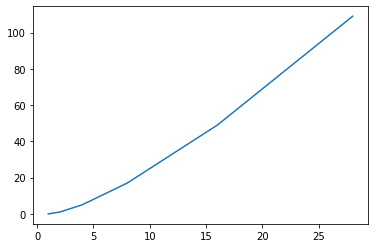

In [44]:
import math
from matplotlib import pyplot as plt
import random

def maxCenter(a, c, l, r, level = 0, Verbose = False):
    ls = -math.inf
    rs = -math.inf
    s = 0 
    ll = c-1
    lr = c
    rl = c 
    rr = len(a)
    for i in range (c-1, l-1, -1):
        s += a[i]
        if ls < s:
            ls = s;
            ll = i
         
    s = 0;
    for i in range (c, r):
        s += a[i]
        if rs < s:
            rs = s
            rr = i+1
      

    return ls + rs, ll, rr;

ml = 0  
        
        
def maxSubArray(a, l = -1, r = -1, level = 0, Verbose = False):
    global ml
    if (level > ml): ml = level
    if l == -1 and r == -1:
      l = 0;
      r = len(a);

    if ( r-l == 1):
      return a[r-1], l, r


    c = (l + r) // 2

    l = 0
    ls, ll, lr = maxSubArray(a, l, c, level = level + 1, Verbose = Verbose);
    rs, rl, rr = maxSubArray(a, c , r, level = level + 1, Verbose = Verbose);
    cs, cl, cr = maxCenter(a, c, l, r, level = level + 1, Verbose = Verbose)
    m = max (cs, ls, rs)
    if m == cs:
        return cs, cl, cr;
    elif m == ls:
        return ls, ll, lr
    elif m == rs:
        return rs, rl, rr;


samples = 29
x = [n for n in range(1, samples)]
y = [] 
for i in range(1, samples):
  ml = 0
  arr = [random.randint(-100, 100) for n in range(0, i)]
  print(i)

  s, l, r = maxSubArray(arr)
  y.append(ml)
  
plt.plot(x, y);

Podemos interpretar que no existe un valor al que converja el número de recursiones. Al parecer, este depende de $n$ de forma que $lvl(n) = c \cdot n \log n$. Sin embargo demostrar esto requiere más experimentos.


### Comparación con el algoritmo de Kadane

El algoritmo de Kadane consiste en recorrer linealmente el
arreglo como si fuera una cortina. Se actualizan a medida que uno
se desplaza por el arreglo los limites izquierdo y derecho.


In [ ]:
def maxSub(a):
    max = 0;
    maxEnd = 0;
    l = 0; r = 0;

    startIndex = 0;
    for i in range(len(a)):
      if (maxEnd + a[i] < 0):
        startIndex = i+1;
        maxEnd = 0;
      else: 
        maxEnd += a[i];
      if maxEnd > max:
        max = maxEnd;
        l = startIndex;
        r = i;
      if sum:
        return l, r+1
      else:
        return 0, 0 


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29


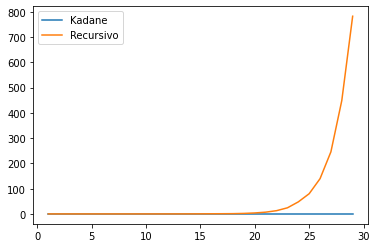

In [42]:
x = [n for n in range (1, samples)]
yk = []
ymsa = []
for i in range(1, samples):
  a = [random.randint(-100, 100) for n in range(i)] 
  t1 = repeat(setup="from __main__ import maxSubArray", stmt=f"maxSubArray({a})", repeat=1, number=10)
    t = repeat(setup="from __main__ import maxSub", stmt=f"maxSub({a})", repeat=1, number=10)
    yk.append(t)
    ymsa.append(t1)
plt.plot(x, yk)
plt.plot(x, ymsa)
plt.legend(["Kadane", "Recursivo"])
plt.show()


El tiempo de ejecución es sumamente elevado y creo que algo anda mal. Pues no es normal que demore 800ms para un arreglo de 30 elementos. (En mi computador un arreglo de 300 elementos toma 300ms, exactamente el mismo algoritmo). 

A pesar de esto podemos notar que el algoritmo de Kadane se comporta mucho mejor que el algoritmo recursivo a medida que aumenta el tamaño de la muestra.